<a href="https://colab.research.google.com/github/DrUzair/hadoop/blob/master/Spark2_X_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spark Installation

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.3.4/spark-2.3.4-bin-hadoop2.7.tgz
!tar xf spark-2.3.4-bin-hadoop2.7.tgz
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.4-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()

# Upload Data

In [0]:
from google.colab import files
files.upload()

{}

# Spark Session

Spark 2.0 onwards, instead of having a spark context, hive context, SQL context, now all of them are encapsulated in a Spark session object. Having a spark session object alleviate the need for creating Spark Context.

In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Spark_Lab_Bootcamp") \
    .getOrCreate()

You can still access spark context from Spark Session as following.

In [0]:
sc = spark.sparkContext

# Spark SQL

## Reading CSV into and Spark DataFrame 

In [0]:
!wget https://raw.githubusercontent.com/DrUzair/MLSD/master/Datasets/HDP/trucks.csv
trucks_data_frame = spark.read.csv('trucks.csv',inferSchema=True, header=True)
!wget https://raw.githubusercontent.com/DrUzair/MLSD/master/Datasets/HDP/drivers.csv
drivers_data_frame = spark.read.csv('drivers.csv',inferSchema=True, header=True)

--2019-10-14 23:20:03--  https://raw.githubusercontent.com/DrUzair/MLSD/master/Datasets/HDP/trucks.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61378 (60K) [text/plain]
Saving to: ‘trucks.csv’

trucks.csv          100%[===================>]  59.94K  --.-KB/s    in 0.02s   

2019-10-14 23:20:03 (2.41 MB/s) - ‘trucks.csv’ saved [61378/61378]

--2019-10-14 23:20:10--  https://raw.githubusercontent.com/DrUzair/MLSD/master/Datasets/HDP/drivers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2043 (2.0K) [text/plain]
Saving to: ‘drivers

In [0]:
print(type(trucks_data_frame))

<class 'pyspark.sql.dataframe.DataFrame'>


## Explore Data using DataFrame API

In [0]:
print('trucks_data_frame rows {0} cols {1}'.format(trucks_data_frame.count(), len(trucks_data_frame.columns)))
print('drivers_data_frame rows {0} cols {1}'.format(drivers_data_frame.count(), len(drivers_data_frame.columns)))

trucks_data_frame rows 100 cols 111
drivers_data_frame rows 34 cols 6


In [0]:
drivers_data_frame.show(10)

+--------+-----------------+---------+--------------------+---------+---------+
|driverId|             name|      ssn|            location|certified|wage-plan|
+--------+-----------------+---------+--------------------+---------+---------+
|      10|George Vetticaden|621011971|  244-4532 Nulla Rd.|        N|    miles|
|      11|   Jamie Engesser|262112338|  366-4125 Ac Street|        N|    miles|
|      12|      Paul Coddin|198041975|Ap #622-957 Risus...|        Y|    hours|
|      13|      Joe Niemiec|139907145| 2071 Hendrerit. Ave|        Y|    hours|
|      14|       Adis Cesir|820812209| Ap #810-1228 In St.|        Y|    hours|
|      15|     Rohit Bakshi|239005227|   648-5681 Dui- Rd.|        Y|    hours|
|      16|       Tom McCuch|363303105|P.O. Box 313- 962...|        Y|    hours|
|      17|      Eric Mizell|123808238|P.O. Box 579- 219...|        Y|    hours|
|      18|        Grant Liu|171010151|Ap #928-3159 Vest...|        Y|    hours|
|      19|       Ajay Singh|160005158|59

In [0]:
trucks_data_frame.printSchema()

root
 |-- driverid: string (nullable = true)
 |-- truckid: string (nullable = true)
 |-- model: string (nullable = true)
 |-- jun13_miles: integer (nullable = true)
 |-- jun13_gas: integer (nullable = true)
 |-- may13_miles: integer (nullable = true)
 |-- may13_gas: integer (nullable = true)
 |-- apr13_miles: integer (nullable = true)
 |-- apr13_gas: integer (nullable = true)
 |-- mar13_miles: integer (nullable = true)
 |-- mar13_gas: integer (nullable = true)
 |-- feb13_miles: integer (nullable = true)
 |-- feb13_gas: integer (nullable = true)
 |-- jan13_miles: integer (nullable = true)
 |-- jan13_gas: integer (nullable = true)
 |-- dec12_miles: integer (nullable = true)
 |-- dec12_gas: integer (nullable = true)
 |-- nov12_miles: integer (nullable = true)
 |-- nov12_gas: integer (nullable = true)
 |-- oct12_miles: integer (nullable = true)
 |-- oct12_gas: integer (nullable = true)
 |-- sep12_miles: integer (nullable = true)
 |-- sep12_gas: integer (nullable = true)
 |-- aug12_miles: i

In [0]:
trucks_data_frame.select("driverid").show(15, truncate=False)

+--------+
|driverid|
+--------+
|A1      |
|A2      |
|A3      |
|A4      |
|A5      |
|A6      |
|A7      |
|A8      |
|A9      |
|A10     |
|A11     |
|A12     |
|A13     |
|A14     |
|A15     |
+--------+
only showing top 15 rows



In [0]:
trucks_data_frame.groupBy("driverid") \
.count() \
.orderBy("count", ascending=False) \
.show(10)

+--------+-----+
|driverid|count|
+--------+-----+
|     A47|    1|
|     A76|    1|
|     A23|    1|
|     A65|    1|
|     A46|    1|
|      A9|    1|
|     A92|    1|
|     A35|    1|
|     A62|    1|
|      A6|    1|
+--------+-----+
only showing top 10 rows



In [0]:
trucks_data_frame.describe(["jun13_miles","jun13_gas"]).show()
trucks_data_frame.describe(["jun13_miles","jun13_gas"]).toPandas().transpose()

+-------+------------------+-----------------+
|summary|       jun13_miles|        jun13_gas|
+-------+------------------+-----------------+
|  count|               100|              100|
|   mean|          12043.12|          2456.32|
| stddev|1777.4446547237583|436.0520745474922|
|    min|              8490|             1593|
|    max|             15548|             3446|
+-------+------------------+-----------------+



,0,1,2,3,4
summary,count,mean,stddev,min,max
jun13_miles,100,12043.12,1777.4446547237583,8490,15548
jun13_gas,100,2456.32,436.0520745474922,1593,3446


# MLLib

## Data Preparation

### Types

In [0]:
from pyspark.sql import types 

for t in ['BinaryType', 'BooleanType', 'ByteType', 'DateType', 
          'DecimalType', 'DoubleType', 'FloatType', 'IntegerType', 
           'LongType', 'ShortType', 'StringType', 'TimestampType']:
    print(f"{t}: {getattr(types, t)().simpleString()}")

BinaryType: binary
BooleanType: boolean
ByteType: tinyint
DateType: date
DecimalType: decimal(10,0)
DoubleType: double
FloatType: float
IntegerType: int
LongType: bigint
ShortType: smallint
StringType: string
TimestampType: timestamp


In [0]:
!wget https://raw.githubusercontent.com/DrUzair/MLSD/master/Datasets/iris.csv
iris_data_frame = spark.read.csv('iris.csv',inferSchema=True, header=True)
iris_data_frame.show(10)
iris_data_frame.printSchema()

--2019-10-14 23:23:23--  https://raw.githubusercontent.com/DrUzair/MLSD/master/Datasets/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974 (3.9K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.88K  --.-KB/s    in 0s      

2019-10-14 23:23:23 (81.3 MB/s) - ‘iris.csv’ saved [3974/3974]

+------------+-----------+------------+-----------+------+
|sepal_length|sepal_width|petal_length|petal_width| class|
+------------+-----------+------------+-----------+------+
|         5.1|        3.5|         1.4|        0.2|Setosa|
|         4.9|        3.0|         1.4|        0.2|Setosa|
|         4.7|        3.2|         1.3|        0.2|Setosa|
|         4.6|        3.1|         1.5|        0.2|Setosa|
|         5.0|        

### Column Type Conversion

In [0]:
from pyspark.sql.types import DoubleType
iris_data_frame = iris_data_frame.withColumn("sepal_length", iris_data_frame["sepal_length"].cast(DoubleType()))

### String Indexing

In [0]:
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer().setInputCol("class").setOutputCol("classIndex").fit(iris_data_frame)

In [0]:
iris_df_indexed = indexer.transform(iris_data_frame)
iris_df_indexed.show(5)

+------------+-----------+------------+-----------+------+----------+
|sepal_length|sepal_width|petal_length|petal_width| class|classIndex|
+------------+-----------+------------+-----------+------+----------+
|         5.1|        3.5|         1.4|        0.2|Setosa|       2.0|
|         4.9|        3.0|         1.4|        0.2|Setosa|       2.0|
|         4.7|        3.2|         1.3|        0.2|Setosa|       2.0|
|         4.6|        3.1|         1.5|        0.2|Setosa|       2.0|
|         5.0|        3.6|         1.4|        0.2|Setosa|       2.0|
+------------+-----------+------------+-----------+------+----------+
only showing top 5 rows



### OneHotEncoder

In [0]:
from pyspark.ml.feature import OneHotEncoder
encoder = OneHotEncoder().setInputCol("classIndex").setOutputCol("classVec")
iris_df_ohe = encoder.transform(iris_df_indexed)
iris_df_ohe.show(10)

+------------+-----------+------------+-----------+------+----------+---------+
|sepal_length|sepal_width|petal_length|petal_width| class|classIndex| classVec|
+------------+-----------+------------+-----------+------+----------+---------+
|         5.1|        3.5|         1.4|        0.2|Setosa|       2.0|(2,[],[])|
|         4.9|        3.0|         1.4|        0.2|Setosa|       2.0|(2,[],[])|
|         4.7|        3.2|         1.3|        0.2|Setosa|       2.0|(2,[],[])|
|         4.6|        3.1|         1.5|        0.2|Setosa|       2.0|(2,[],[])|
|         5.0|        3.6|         1.4|        0.2|Setosa|       2.0|(2,[],[])|
|         5.4|        3.9|         1.7|        0.4|Setosa|       2.0|(2,[],[])|
|         4.6|        3.4|         1.4|        0.3|Setosa|       2.0|(2,[],[])|
|         5.0|        3.4|         1.5|        0.2|Setosa|       2.0|(2,[],[])|
|         4.4|        2.9|         1.4|        0.2|Setosa|       2.0|(2,[],[])|
|         4.9|        3.1|         1.5| 

### Vector Assembler

In [0]:
from pyspark.ml.feature import VectorAssembler
inputcols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
assembler = VectorAssembler(inputCols= inputcols,
                            outputCol = "predictors")

In [0]:
predictors = assembler.transform(iris_df_indexed)
predictors.columns

['sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width',
 'class',
 'classIndex',
 'predictors']

VectorAssembler adds a **predictors** column to the existing dataframe. Have a look on the newly added column

In [0]:
model_data = predictors.select("predictors", "classIndex")
model_data.show(10)

+-----------------+----------+
|       predictors|classIndex|
+-----------------+----------+
|[5.1,3.5,1.4,0.2]|       2.0|
|[4.9,3.0,1.4,0.2]|       2.0|
|[4.7,3.2,1.3,0.2]|       2.0|
|[4.6,3.1,1.5,0.2]|       2.0|
|[5.0,3.6,1.4,0.2]|       2.0|
|[5.4,3.9,1.7,0.4]|       2.0|
|[4.6,3.4,1.4,0.3]|       2.0|
|[5.0,3.4,1.5,0.2]|       2.0|
|[4.4,2.9,1.4,0.2]|       2.0|
|[4.9,3.1,1.5,0.1]|       2.0|
+-----------------+----------+
only showing top 10 rows



Split the data into training and test.

In [0]:
train_data, test_data = model_data.randomSplit([0.8,0.2])

## Classification: Decision Trees

In [0]:
from pyspark.ml.classification import DecisionTreeClassifier

In [0]:
dt = DecisionTreeClassifier(featuresCol = 'predictors', labelCol = 'classIndex', maxDepth = 3)
dtModel = dt.fit(train_data)
predictions = dtModel.transform(test_data)
predictions.show(10)


+-----------------+----------+--------------+--------------------+----------+
|       predictors|classIndex| rawPrediction|         probability|prediction|
+-----------------+----------+--------------+--------------------+----------+
|[4.4,3.0,1.3,0.2]|       2.0|[0.0,0.0,38.0]|       [0.0,0.0,1.0]|       2.0|
|[4.6,3.2,1.4,0.2]|       2.0|[0.0,0.0,38.0]|       [0.0,0.0,1.0]|       2.0|
|[4.6,3.6,1.0,0.2]|       2.0|[0.0,0.0,38.0]|       [0.0,0.0,1.0]|       2.0|
|[4.9,3.0,1.4,0.2]|       2.0|[0.0,0.0,38.0]|       [0.0,0.0,1.0]|       2.0|
|[5.0,2.3,3.3,1.0]|       1.0|[1.0,41.0,0.0]|[0.02380952380952...|       1.0|
|[5.0,3.4,1.6,0.4]|       2.0|[0.0,0.0,38.0]|       [0.0,0.0,1.0]|       2.0|
|[5.0,3.5,1.3,0.3]|       2.0|[0.0,0.0,38.0]|       [0.0,0.0,1.0]|       2.0|
|[5.0,3.5,1.6,0.6]|       2.0|[0.0,0.0,38.0]|       [0.0,0.0,1.0]|       2.0|
|[5.0,3.6,1.4,0.2]|       2.0|[0.0,0.0,38.0]|       [0.0,0.0,1.0]|       2.0|
|[5.4,3.0,4.5,1.5]|       1.0|[1.0,41.0,0.0]|[0.02380952380952..

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="classIndex", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g " % (1.0 - accuracy))
# summary only
print(dtModel)

Test Error = 0 
DecisionTreeClassificationModel (uid=DecisionTreeClassifier_4a87a2d28576b26edb1d) of depth 3 with 9 nodes


In [0]:
!wget https://raw.githubusercontent.com/DrUzair/MLSD/master/Datasets/galton.csv
df_galton = spark.read.csv('galton.csv',inferSchema=True, header=True)
df_galton.show(10)
df_galton.printSchema()

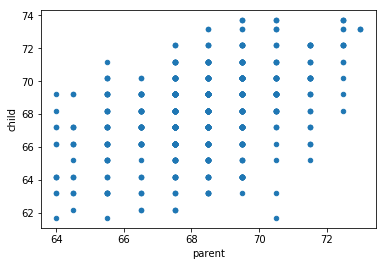

In [0]:
import pandas as pd
pd_df_galton_sample = df_galton.select(["parent", "child"]).sample(False, 0.8).toPandas()
pd_df_galton_sample.plot.scatter("parent", "child")

In [0]:
from pyspark.ml.feature import VectorAssembler
inputcols = ['parent']
assembler = VectorAssembler(inputCols= inputcols, outputCol = "features")
df_galton = assembler.transform(df_galton)
df_galton.show(5)

+---+-----+------+--------+
|_c0|child|parent|features|
+---+-----+------+--------+
|  1| 61.7|  70.5|  [70.5]|
|  2| 61.7|  68.5|  [68.5]|
|  3| 61.7|  65.5|  [65.5]|
|  4| 61.7|  64.5|  [64.5]|
|  5| 61.7|  64.0|  [64.0]|
+---+-----+------+--------+
only showing top 5 rows



## Regression

In [0]:
df_galton_train, df_galton_test = df_galton.randomSplit([0.7, 0.3])

#### Linear Regression

In [0]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='child', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(df_galton_train)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [0.5365408122515284]
Intercept: 31.378346556443798


In [0]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 2.236478
r2: 0.223148


r^2 about 21% ?. Pfffff ! model explains only 21% variability in the data then. 

In [0]:
lr_predictions = lr_model.transform(df_galton_test)
lr_predictions.select("prediction","child", "features").show(5)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="child",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+-----------------+-----+--------+
|       prediction|child|features|
+-----------------+-----+--------+
|66.52176975891891| 61.7|  [65.5]|
|69.20447382017655| 63.2|  [70.5]|
| 68.1313921956735| 63.2|  [68.5]|
| 68.1313921956735| 63.2|  [68.5]|
| 68.1313921956735| 63.2|  [68.5]|
+-----------------+-----+--------+
only showing top 5 rows

R Squared (R2) on test data = 0.141173


In [0]:
predictions = lr_model.transform(df_galton_test)
predictions.select("features", "child", "prediction").show()

+--------+-----+-----------------+
|features|child|       prediction|
+--------+-----+-----------------+
|  [65.5]| 61.7|66.52176975891891|
|  [70.5]| 63.2|69.20447382017655|
|  [68.5]| 63.2| 68.1313921956735|
|  [68.5]| 63.2| 68.1313921956735|
|  [68.5]| 63.2| 68.1313921956735|
|  [67.5]| 63.2|67.59485138342197|
|  [69.5]| 64.2|68.66793300792501|
|  [69.5]| 64.2|68.66793300792501|
|  [69.5]| 64.2|68.66793300792501|
|  [69.5]| 64.2|68.66793300792501|
|  [69.5]| 64.2|68.66793300792501|
|  [68.5]| 64.2| 68.1313921956735|
|  [68.5]| 64.2| 68.1313921956735|
|  [68.5]| 64.2| 68.1313921956735|
|  [68.5]| 64.2| 68.1313921956735|
|  [68.5]| 64.2| 68.1313921956735|
|  [67.5]| 64.2|67.59485138342197|
|  [67.5]| 64.2|67.59485138342197|
|  [67.5]| 64.2|67.59485138342197|
|  [66.5]| 64.2|67.05831057117044|
+--------+-----+-----------------+
only showing top 20 rows



#### Regression using Decision Trees

In [0]:
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'child')
dt_model = dt.fit(df_galton_train)
dt_predictions = dt_model.transform(df_galton_test)
dt_evaluator = RegressionEvaluator(
    labelCol="child", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 2.28381


In [0]:
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'child', maxIter=10)
gbt_model = gbt.fit(df_galton_train)
gbt_predictions = gbt_model.transform(df_galton_test)
gbt_evaluator = RegressionEvaluator(labelCol="child", predictionCol="prediction", metricName="rmse")
rmse = gbt_evaluator.evaluate(gbt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)
gbt_predictions.select('prediction', 'child', 'features').show(5)

Root Mean Squared Error (RMSE) on test data = 2.28381
+-----------------+-----+--------+
|       prediction|child|features|
+-----------------+-----+--------+
|66.42916666666662| 61.7|  [65.5]|
|69.30638297872338| 63.2|  [70.5]|
|68.13910256410261| 63.2|  [68.5]|
|68.13910256410261| 63.2|  [68.5]|
|68.13910256410261| 63.2|  [68.5]|
+-----------------+-----+--------+
only showing top 5 rows



## Clustering

In [0]:
!wget https://raw.githubusercontent.com/DrUzair/MLSD/master/Datasets/galton.csv
df_galton = spark.read.csv('galton.csv',inferSchema=True, header=True)
from pyspark.ml.feature import VectorAssembler
inputcols = ['parent', 'child']
assembler = VectorAssembler(inputCols= inputcols, outputCol = "features")
df_galton = assembler.transform(df_galton)
df_galton.show(5)

--2019-10-14 23:26:24--  https://raw.githubusercontent.com/DrUzair/MLSD/master/Datasets/galton.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14724 (14K) [text/plain]
Saving to: ‘galton.csv.1’

galton.csv.1        100%[===================>]  14.38K  --.-KB/s    in 0.01s   

2019-10-14 23:26:24 (1.18 MB/s) - ‘galton.csv.1’ saved [14724/14724]

+---+-----+------+-----------+
|_c0|child|parent|   features|
+---+-----+------+-----------+
|  1| 61.7|  70.5|[70.5,61.7]|
|  2| 61.7|  68.5|[68.5,61.7]|
|  3| 61.7|  65.5|[65.5,61.7]|
|  4| 61.7|  64.5|[64.5,61.7]|
|  5| 61.7|  64.0|[64.0,61.7]|
+---+-----+------+-----------+
only showing top 5 rows



In [0]:
from pyspark.ml.clustering import KMeans

kmeans = KMeans(k=8, seed=1)  # 2 clusters here
model = kmeans.fit(df_galton.select('features'))

In [0]:
transformed = model.transform(df_galton)
# transformed.show() 

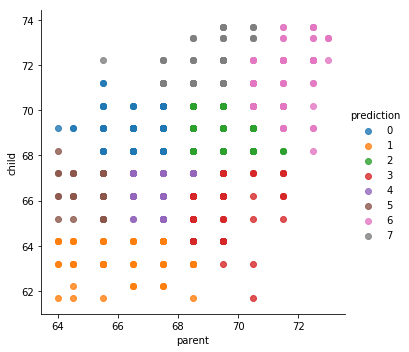

In [0]:
type(transformed)
import seaborn as sns
sns.lmplot( x="parent", y="child", data=transformed.toPandas(), fit_reg=False, hue='prediction', legend=True)


+---+-----+------+-----------+
|_c0|child|parent|   features|
+---+-----+------+-----------+
|  1| 61.7|  70.5|[70.5,61.7]|
|  2| 61.7|  68.5|[68.5,61.7]|
|  3| 61.7|  65.5|[65.5,61.7]|
|  4| 61.7|  64.5|[64.5,61.7]|
|  5| 61.7|  64.0|[64.0,61.7]|
+---+-----+------+-----------+
only showing top 5 rows



Py4JJavaError: ignored

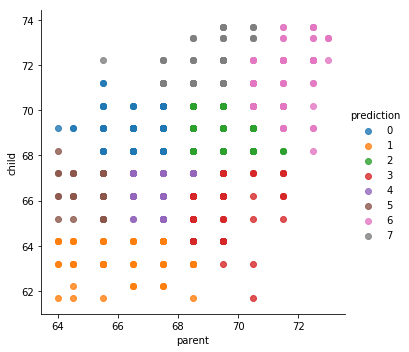

In [0]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Spark_Clustering_Lab") \
    .getOrCreate()

# !wget https://raw.githubusercontent.com/DrUzair/MLSD/master/Datasets/galton.csv
df_galton = spark.read.csv('galton.csv',inferSchema=True, header=True)

inputcols = ['parent', 'child']
assembler = VectorAssembler(inputCols= inputcols, outputCol = "features")
df_galton = assembler.transform(df_galton)
df_galton.show(5)

kmeans = KMeans(k=8, seed=1)  # 2 clusters here
model = kmeans.fit(df_galton.select('features'))

transformed = model.transform(df_galton)

import seaborn as sns
sns.lmplot( x="parent", y="child", data=transformed.toPandas(), fit_reg=False, hue='prediction', legend=True)

transformed.toPandas().to_csv('galton_clusters1.csv')
transformed.write.csv('galton_clusters2.csv')